In [11]:
import pandas as pd
from path import Path
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.svm import SVR
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, mean_absolute_percentage_error
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
import joblib

In [53]:
data_path = "DataScience_cleaned.csv"
df = pd.read_csv(data_path)
print(df.shape)
df.head()

(1427, 11)


,title,company,yearsofexperience,totalyearlycompensation,gender,Doctorate_Degree,Masters_Degree,Bachelors_Degree,tag,state,city
0,Data Scientist,LinkedIn,4.0,233000,Male,0,0,0,Data Analysis,CA,San Francisco
1,Data Scientist,Microsoft,11.0,218000,Male,0,0,0,ML / AI,WA,Seattle
2,Data Scientist,ebay,10.0,180000,Female,0,0,0,NaN,CA,San Jose
3,Data Scientist,Facebook,8.0,370000,Male,0,0,0,NaN,WA,Seattle
4,Data Scientist,Amazon,3.0,200000,Male,0,0,0,ML / AI,WA,Seattle


In [54]:
headers1 = ["company", "yearsofexperience", "Doctorate_Degree", "Masters_Degree", "Bachelors_Degree", "state", "city", "tag", "gender", "totalyearlycompensation"]
cat = ["company", "state", "city", "tag", "gender"]
df_clean1 = df[headers1]
df_clean1

,company,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,state,city,tag,gender,totalyearlycompensation
0,LinkedIn,4.0,0,0,0,CA,San Francisco,Data Analysis,Male,233000
1,Microsoft,11.0,0,0,0,WA,Seattle,ML / AI,Male,218000
2,ebay,10.0,0,0,0,CA,San Jose,NaN,Female,180000
3,Facebook,8.0,0,0,0,WA,Seattle,NaN,Male,370000
4,Amazon,3.0,0,0,0,WA,Seattle,ML / AI,Male,200000
...,...,...,...,...,...,...,...,...,...,...
1422,Amazon,10.0,0,0,0,CA,Palo Alto,Full Stack,Female,260000
1423,Procter & Gamble,5.0,0,0,0,OH,Cincinnati,ML / AI,Male,135000
1424,Deloitte,3.0,0,0,0,IL,Chicago,ML / AI,Male,190000
1425,IBM,5.0,0,0,0,DC,Washington,ML / AI,Male,155000


In [55]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_clean1[cat]), index=df_clean1.index)

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat)
encode_df.head()

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_3M,company_3m,company_ABB,company_ADP,company_AMAZON,company_ASML,company_AT&T,company_AWS,company_Accenture,company_Acorns,...,tag_product analytics,tag_product org,tag_project management,tag_recommender systems,tag_scot,tag_survey analysis,tag_nan,gender_Female,gender_Male,gender_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# Merge one-hot encoded features and drop the originals
df_clean1 = df_clean1.merge(encode_df,left_index=True, right_index=True)
df_clean1 = df_clean1.drop(cat,1)
df_clean1

C:\Users\rghaf\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,yearsofexperience,Doctorate_Degree,Masters_Degree,Bachelors_Degree,totalyearlycompensation,company_3M,company_3m,company_ABB,company_ADP,company_AMAZON,...,tag_product analytics,tag_product org,tag_project management,tag_recommender systems,tag_scot,tag_survey analysis,tag_nan,gender_Female,gender_Male,gender_Other
0,4.0,0,0,0,233000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0,0,0,218000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.0,0,0,0,180000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,8.0,0,0,0,370000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,3.0,0,0,0,200000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,10.0,0,0,0,260000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1423,5.0,0,0,0,135000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1424,3.0,0,0,0,190000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1425,5.0,0,0,0,155000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
# Split our preprocessed data into our features and target arrays
y = df_clean1.totalyearlycompensation
X = df_clean1.drop(columns=["totalyearlycompensation"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.8)

In [58]:
X_train_scaled1 = MinMaxScaler().fit_transform(X_train)
X_test_scaled1 = MinMaxScaler().fit_transform(X_test)
X_train_scaled1

array([[0.05, 1.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.1 , 0.  , 1.  , ..., 0.  , 1.  , 0.  ],
       [0.35, 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.1 , 0.  , 1.  , ..., 0.  , 1.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 1.  , 0.  ]])

In [59]:
lr = LinearRegression()
lr.fit(X_train_scaled1, y_train)
predictions = lr.predict(X_test_scaled1)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
1268,7.448313e+16,360000
160,9.810340e+17,108000
919,3.283497e+17,209000
521,2.163200e+05,245000
1300,-3.840527e+17,172000
...,...,...
771,2.325760e+05,198000
753,1.178501e+17,81000
998,2.900480e+05,414000
415,-3.865333e+18,140000


In [60]:
training_score = lr.score(X_train_scaled1, y_train)
testing_score = lr.score(X_test_scaled1, y_test)
mape = mean_absolute_percentage_error(y_test, predictions)
#rmse = mse**.5
print(mape)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

3620807825267.928
Training Score: 0.7849866607220854
Testing Score: -2.8771388165458303e+26


In [61]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 150, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

Y_predRFR = regressor.predict(X_test)  # test the output by changing values

In [62]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)
mse = mean_absolute_percentage_error(y_test, Y_predRFR)
rmse = mse**.5
print(mse)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

0.18151534221286286
Training Score: 0.9199300564593621
Testing Score: 0.6208621007050208


In [ ]:
# save ML_Model
joblib.dump(regressor, "./RF_model.joblib")

In [ ]:
loaded_rf = joblib.load("./RF_model.joblib")

In [63]:
# fit model no training data
xgb = XGBRegressor(n_estimators=200, max_depth=9, eta=0.175, subsample=0.6, colsample_bytree=0.85)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85,
             enable_categorical=False, eta=0.175, gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.174999997, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [64]:
Y_predXGB = xgb.predict(X_test)


training_score = xgb.score(X_train, y_train)
testing_score = xgb.score(X_test, y_test)
mse = mean_absolute_percentage_error(y_test, Y_predXGB)
rmse = mse**.5
print(mse)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

0.18632092388294988
Training Score: 0.9650563950623591
Testing Score: 0.6537604360165015


In [ ]:
pred = pd.DataFrame({"RFR_Pred": Y_predRFR,"XGB_Pred": Y_predXGB, "Actual": y_test})
pred.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(pred)

In [16]:
useless_columns = []
mod = sm.OLS(y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
for i in range(0,715):
#p_values
    if p_values[i] > 0.05:
        useless_columns.append(p_values.index[i])
        print(p_values.index[i],"      " , p_values[i])

Masters_Degree        0.8829776914244912
Bachelors_Degree        0.16411601548222993
company_3M        0.8598921136170794
company_3m        0.8539687707682142
company_ABB        0.3861898303457322
company_ADP        0.959018916345088
company_AMAZON        0.9669713829080859
company_ASML        0.4438570604474634
company_AT&T        0.7242493805798489
company_AWS        0.25122159653024284
company_Acorns        0.9647442209537521
company_Addepar        0.5116919886327427
company_Aetna        0.7071497670594331
company_Affirm        0.9786740329442953
company_Allstate        0.17796057316662248
company_Amadeus        0.3410327698481108
company_Amazon.com        0.8296911198920728
company_American Express        0.784141922600555
company_American Family Insurance        0.7918228799164885
company_American express        0.5912978771758397
company_Amobee        0.5544850557559154
company_Applied Materials        0.13549824619629672
company_Aptiv        0.14695474001039535
company_Asana    

In [17]:
df_clean2 = df_clean1.drop(useless_columns, axis=1)
df_clean2

,yearsofexperience,Doctorate_Degree,totalyearlycompensation,company_Accenture,company_Adobe,company_Airbnb,company_Amazon,company_Amazon Web Services,company_AppDynamics,company_Apple,...,tag_ML / AI,tag_Operations Research,tag_Product,tag_Quant,tag_gTech,tag_project management,tag_recommender systems,gender_Female,gender_Male,gender_Other
0,4.0,0,233000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0,218000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10.0,0,180000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,8.0,0,370000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.0,0,200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,10.0,0,260000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1423,5.0,0,135000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1424,3.0,0,190000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1425,5.0,0,155000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
print(len(useless_columns))
df_clean2.columns

638


Index(['yearsofexperience', 'Doctorate_Degree', 'totalyearlycompensation',
       'company_Accenture', 'company_Adobe', 'company_Airbnb',
       'company_Amazon', 'company_Amazon Web Services', 'company_AppDynamics',
       'company_Apple', 'company_Bank of America Merrill Lynch',
       'company_Capital One', 'company_Cerner', 'company_Chime',
       'company_DoorDash', 'company_Facebook', 'company_FedEx',
       'company_Fractal Analytics', 'company_Global Payments',
       'company_Google', 'company_Instacart', 'company_Intuit',
       'company_LinkedIn', 'company_Lyft', 'company_Macy's',
       'company_McKesson', 'company_Microsoft', 'company_Netflix',
       'company_Nextdoor', 'company_PayPal', 'company_Pinterest',
       'company_Quantcast', 'company_QuantumBlack', 'company_Salesforce',
       'company_Snap', 'company_State Street', 'company_Stitch Fix',
       'company_Stripe', 'company_Twilio', 'company_Twitter', 'company_Uber',
       'company_Walmart Labs', 'company_Waymo',

In [48]:
predict_df = pd.DataFrame(columns = df_clean2.columns)
Anna_Conda = {'yearsofexperience': 0, 'Doctorate_Degree' : 0, 'totalyearlycompensation' : 0,
       'company_Accenture' : 0, 'company_Adobe' : 0, 'company_Airbnb' : 0,
       'company_Amazon' : 0, 'company_Amazon Web Services': 0 , 'company_AppDynamics': 0,
       'company_Apple': 0 , 'company_Bank of America Merrill Lynch' : 0,
       'company_Capital One' : 0, 'company_Cerner' : 0, 'company_Chime' : 0,
       'company_DoorDash' : 0, 'company_Facebook' : 0, 'company_FedEx' : 0,
       'company_Fractal Analytics' : 0, 'company_Global Payments' : 0,
       'company_Google' : 0, 'company_Instacart' : 0, 'company_Intuit' : 0,
       'company_LinkedIn' : 0, 'company_Lyft' : 0, "company_Macy's" : 0,
       'company_McKesson' : 0, 'company_Microsoft' : 0, 'company_Netflix' : 1,
       'company_Nextdoor' : 0, 'company_PayPal' : 0, 'company_Pinterest' : 0,
       'company_Quantcast' : 0, 'company_QuantumBlack':0, 'company_Salesforce':0,
       'company_Snap':0, 'company_State Street':0, 'company_Stitch Fix':0,
       'company_Stripe':0, 'company_Twilio':0, 'company_Twitter':0, 'company_Uber':0,
       'company_Walmart Labs':0, 'company_Waymo':0, 'company_Workday':0,
       'company_Zillow':0, 'company_Zoom':0, 'company_eBay':0, 'company_paypal':0,
       'state_CA':0, 'state_KY':0, 'state_NY':0, 'city_Berkeley':0, 'city_Kansas City':0,
       'city_Louisville':0, 'city_Memphis':0, 'city_Oakland':0, 'city_San Francisco':0,
       'city_San Juan Bautista':0, 'tag_AI':0, 'tag_AI/ML':0, 'tag_AOS':0,
       'tag_Business Intelligence Engineer':0, 'tag_Data and Applied Scinece':0,
       'tag_Data scientist':0, 'tag_Distributed Systems (Back-End)':0,
       'tag_Experimentation':0, 'tag_Fraud':0, 'tag_Full Stack':0, 'tag_ML / AI':0,
       'tag_Operations Research':0, 'tag_Product':0, 'tag_Quant':0, 'tag_gTech':0,
       'tag_project management':0, 'tag_recommender systems':0, 'gender_Female':1,
       'gender_Male':0, 'gender_Other':0}


Bat_Man = {'yearsofexperience': 3, 'Doctorate_Degree' : 0, 'totalyearlycompensation' : 0,
       'company_Accenture' : 0, 'company_Adobe' : 0, 'company_Airbnb' : 0,
       'company_Amazon' : 0, 'company_Amazon Web Services': 0 , 'company_AppDynamics': 0,
       'company_Apple': 0 , 'company_Bank of America Merrill Lynch' : 0,
       'company_Capital One' : 0, 'company_Cerner' : 0, 'company_Chime' : 0,
       'company_DoorDash' : 0, 'company_Facebook' : 1, 'company_FedEx' : 0,
       'company_Fractal Analytics' : 0, 'company_Global Payments' : 0,
       'company_Google' : 0, 'company_Instacart' : 0, 'company_Intuit' : 0,
       'company_LinkedIn' : 0, 'company_Lyft' : 0, "company_Macy's" : 0,
       'company_McKesson' : 0, 'company_Microsoft' : 0, 'company_Netflix' : 0,
       'company_Nextdoor' : 0, 'company_PayPal' : 0, 'company_Pinterest' : 0,
       'company_Quantcast' : 0, 'company_QuantumBlack':0, 'company_Salesforce':0,
       'company_Snap':0, 'company_State Street':0, 'company_Stitch Fix':0,
       'company_Stripe':0, 'company_Twilio':0, 'company_Twitter':0, 'company_Uber':0,
       'company_Walmart Labs':0, 'company_Waymo':0, 'company_Workday':0,
       'company_Zillow':0, 'company_Zoom':0, 'company_eBay':0, 'company_paypal':0,
       'state_CA':1, 'state_KY':0, 'state_NY':0, 'city_Berkeley':0, 'city_Kansas City':0,
       'city_Louisville':0, 'city_Memphis':0, 'city_Oakland':0, 'city_San Francisco':0,
       'city_San Juan Bautista':0, 'tag_AI':0, 'tag_AI/ML':0, 'tag_AOS':0,
       'tag_Business Intelligence Engineer':0, 'tag_Data and Applied Scinece':0,
       'tag_Data scientist':0, 'tag_Distributed Systems (Back-End)':0,
       'tag_Experimentation':0, 'tag_Fraud':0, 'tag_Full Stack':0, 'tag_ML / AI':0,
       'tag_Operations Research':0, 'tag_Product':0, 'tag_Quant':0, 'tag_gTech':0,
       'tag_project management':0, 'tag_recommender systems':0, 'gender_Female':0,
       'gender_Male':1, 'gender_Other':0}

Crystal_Ball = {'yearsofexperience': 7, 'Doctorate_Degree' : 0, 'totalyearlycompensation' : 0,
       'company_Accenture' : 0, 'company_Adobe' : 0, 'company_Airbnb' : 0,
       'company_Amazon' : 0, 'company_Amazon Web Services': 0 , 'company_AppDynamics': 0,
       'company_Apple': 0 , 'company_Bank of America Merrill Lynch' : 0,
       'company_Capital One' : 0, 'company_Cerner' : 0, 'company_Chime' : 0,
       'company_DoorDash' : 0, 'company_Facebook' : 1, 'company_FedEx' : 0,
       'company_Fractal Analytics' : 0, 'company_Global Payments' : 0,
       'company_Google' : 0, 'company_Instacart' : 0, 'company_Intuit' : 0,
       'company_LinkedIn' : 0, 'company_Lyft' : 0, "company_Macy's" : 0,
       'company_McKesson' : 0, 'company_Microsoft' : 0, 'company_Netflix' : 0,
       'company_Nextdoor' : 0, 'company_PayPal' : 0, 'company_Pinterest' : 0,
       'company_Quantcast' : 0, 'company_QuantumBlack':0, 'company_Salesforce':0,
       'company_Snap':0, 'company_State Street':0, 'company_Stitch Fix':0,
       'company_Stripe':0, 'company_Twilio':0, 'company_Twitter':0, 'company_Uber':0,
       'company_Walmart Labs':0, 'company_Waymo':0, 'company_Workday':0,
       'company_Zillow':0, 'company_Zoom':0, 'company_eBay':0, 'company_paypal':0,
       'state_CA':0, 'state_KY':0, 'state_NY':1, 'city_Berkeley':0, 'city_Kansas City':0,
       'city_Louisville':0, 'city_Memphis':0, 'city_Oakland':0, 'city_San Francisco':0,
       'city_San Juan Bautista':0, 'tag_AI':0, 'tag_AI/ML':0, 'tag_AOS':0,
       'tag_Business Intelligence Engineer':0, 'tag_Data and Applied Scinece':0,
       'tag_Data scientist':0, 'tag_Distributed Systems (Back-End)':0,
       'tag_Experimentation':0, 'tag_Fraud':0, 'tag_Full Stack':0, 'tag_ML / AI':0,
       'tag_Operations Research':0, 'tag_Product':0, 'tag_Quant':0, 'tag_gTech':0,
       'tag_project management':0, 'tag_recommender systems':0, 'gender_Female':0,
       'gender_Male':0, 'gender_Other':1}

Dr_Pandas = {'yearsofexperience': 10, 'Doctorate_Degree' : 1, 'totalyearlycompensation' : 0,
       'company_Accenture' : 0, 'company_Adobe' : 0, 'company_Airbnb' : 0,
       'company_Amazon' : 1, 'company_Amazon Web Services': 0 , 'company_AppDynamics': 0,
       'company_Apple': 0 , 'company_Bank of America Merrill Lynch' : 0,
       'company_Capital One' : 0, 'company_Cerner' : 0, 'company_Chime' : 0,
       'company_DoorDash' : 0, 'company_Facebook' : 0, 'company_FedEx' : 0,
       'company_Fractal Analytics' : 0, 'company_Global Payments' : 0,
       'company_Google' : 0, 'company_Instacart' : 0, 'company_Intuit' : 0,
       'company_LinkedIn' : 0, 'company_Lyft' : 0, "company_Macy's" : 0,
       'company_McKesson' : 0, 'company_Microsoft' : 0, 'company_Netflix' : 0,
       'company_Nextdoor' : 0, 'company_PayPal' : 0, 'company_Pinterest' : 0,
       'company_Quantcast' : 0, 'company_QuantumBlack':0, 'company_Salesforce':0,
       'company_Snap':0, 'company_State Street':0, 'company_Stitch Fix':0,
       'company_Stripe':0, 'company_Twilio':0, 'company_Twitter':0, 'company_Uber':0,
       'company_Walmart Labs':0, 'company_Waymo':0, 'company_Workday':0,
       'company_Zillow':0, 'company_Zoom':0, 'company_eBay':0, 'company_paypal':0,
       'state_CA':0, 'state_KY':0, 'state_NY':0, 'city_Berkeley':0, 'city_Kansas City':0,
       'city_Louisville':0, 'city_Memphis':0, 'city_Oakland':0, 'city_San Francisco':0,
       'city_San Juan Bautista':0, 'tag_AI':0, 'tag_AI/ML':0, 'tag_AOS':0,
       'tag_Business Intelligence Engineer':0, 'tag_Data and Applied Scinece':0,
       'tag_Data scientist':0, 'tag_Distributed Systems (Back-End)':0,
       'tag_Experimentation':0, 'tag_Fraud':0, 'tag_Full Stack':0, 'tag_ML / AI':0,
       'tag_Operations Research':0, 'tag_Product':0, 'tag_Quant':0, 'tag_gTech':0,
       'tag_project management':0, 'tag_recommender systems':0, 'gender_Female':0,
       'gender_Male':1, 'gender_Other':0}

predict_df = predict_df.append(Anna_Conda, ignore_index=True)
predict_df = predict_df.append(Bat_Man, ignore_index=True)
predict_df = predict_df.append(Crystal_Ball, ignore_index=True)
predict_df = predict_df.append(Dr_Pandas, ignore_index=True)
predict_df = predict_df.drop(columns=["totalyearlycompensation"])
predict_df = predict_df.astype(int)
print(predict_df.dtypes)
predict_df

yearsofexperience          int32
Doctorate_Degree           int32
company_Accenture          int32
company_Adobe              int32
company_Airbnb             int32
                           ...  
tag_project management     int32
tag_recommender systems    int32
gender_Female              int32
gender_Male                int32
gender_Other               int32
Length: 77, dtype: object


,yearsofexperience,Doctorate_Degree,company_Accenture,company_Adobe,company_Airbnb,company_Amazon,company_Amazon Web Services,company_AppDynamics,company_Apple,company_Bank of America Merrill Lynch,...,tag_ML / AI,tag_Operations Research,tag_Product,tag_Quant,tag_gTech,tag_project management,tag_recommender systems,gender_Female,gender_Male,gender_Other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
df_predRFR = regressor.predict(predict_df)
df_predRFR

array([128122.93650794, 224985.42857143, 264656.77777778, 293328.53968254])

In [50]:
df_predXGB = xgb.predict(predict_df)
df_predXGB

array([226028.11, 199981.12, 368097.62, 251140.2 ], dtype=float32)

In [27]:
# Split our preprocessed data into our features and target arrays
y = df_clean2.totalyearlycompensation
X = df_clean2.drop(columns=["totalyearlycompensation"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.8)

In [28]:
X_train_scaled1 = MinMaxScaler().fit_transform(X_train)
X_test_scaled1 = MinMaxScaler().fit_transform(X_test)
X_train_scaled1

array([[0.05, 1.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.1 , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.35, 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.1 , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.05, 0.  , 0.  , ..., 0.  , 1.  , 0.  ]])

In [29]:
lr = LinearRegression()
lr.fit(X_train_scaled1, y_train)
predictions = lr.predict(X_test_scaled1)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
1268,280440.0,360000
160,158784.0,108000
919,230016.0,209000
521,186008.0,245000
1300,257224.0,172000
...,...,...
771,228744.0,198000
753,108824.0,81000
998,316216.0,414000
415,139592.0,140000


In [30]:
training_score = lr.score(X_train_scaled1, y_train)
testing_score = lr.score(X_test_scaled1, y_test)
mape = mean_absolute_percentage_error(y_test, predictions)
#rmse = mse**.5
print(mape)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

12065008777.19025
Training Score: 0.6473000755114426
Testing Score: -2.796067169073451e+23


In [31]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 150, random_state = 42)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

Y_predRFR = regressor.predict(X_test)  # test the output by changing values

In [32]:
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)
mse = mean_absolute_percentage_error(y_test, Y_predRFR)
rmse = mse**.5
print(mse)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

0.2065576465011958
Training Score: 0.8534246593899348
Testing Score: 0.557168704178432


In [33]:
# fit model no training data
xgb = XGBRegressor(n_estimators=40, max_depth=9, eta=0.175, subsample=0.6, colsample_bytree=0.85)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85,
             enable_categorical=False, eta=0.175, gamma=0, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.174999997, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=40, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [34]:
Y_predXGB = xgb.predict(X_test)


training_score = xgb.score(X_train, y_train)
testing_score = xgb.score(X_test, y_test)
mape = mean_absolute_percentage_error(y_test, Y_predXGB)
rmse = mse**.5
print(mape)
#print(rmse)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

0.19791883305599556
Training Score: 0.7651695110111252
Testing Score: 0.6188460418597407


In [ ]:
df_clean1.columns

In [ ]:
importances = regressor.feature_importances_
importances

In [ ]:
#print(regressor.feature_importances_)
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(regressor, prefit=True)
sel.transform(X_train)
sel.get_support()

In [65]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [66]:
len(X_train_scaled[0])

715

In [67]:
#### Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 900
hidden_nodes_layer2 = 900
hidden_nodes_layer3 = 300
hidden_nodes_layer4 = 100

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# 4th hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Check the structure of the model
nn3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 900)               644400    
                                                                 
 dense_1 (Dense)             (None, 900)               810900    
                                                                 
 dense_2 (Dense)             (None, 300)               270300    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,755,801
Trainable params: 1,755,801
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the model
nn3.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.mean_absolute_percentage_error])

In [69]:
# Train the model
fit_model = nn3.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
36/36 [==============================] - 1s 6ms/step - loss: 47672487936.0000 - mean_absolute_percentage_error: 98.8897
Epoch 2/20
36/36 [==============================] - 0s 6ms/step - loss: 21694992384.0000 - mean_absolute_percentage_error: 60.5690
Epoch 3/20
36/36 [==============================] - 0s 6ms/step - loss: 5269267456.0000 - mean_absolute_percentage_error: 27.6379
Epoch 4/20
36/36 [==============================] - 0s 6ms/step - loss: 3487362816.0000 - mean_absolute_percentage_error: 21.7056
Epoch 5/20
36/36 [==============================] - 0s 6ms/step - loss: 2637516544.0000 - mean_absolute_percentage_error: 17.9395
Epoch 6/20
36/36 [==============================] - 0s 7ms/step - loss: 2081735168.0000 - mean_absolute_percentage_error: 15.9737
Epoch 7/20
36/36 [==============================] - 0s 6ms/step - loss: 1761600128.0000 - mean_absolute_percentage_error: 14.2745
Epoch 8/20
36/36 [==============================] - 0s 6ms/step - loss: 1542813568.0000 

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, mean_absolute_percentage_error: {model_accuracy}")

9/9 - 0s - loss: 3936994560.0000 - mean_absolute_percentage_error: 25.0547 - 105ms/epoch - 12ms/step
Loss: 3936994560.0, mean_absolute_percentage_error: 25.05467987060547


In [71]:
Y_predNN = nn3.predict(X_test)
Y_predNN

array([[423666.12  ],
       [ 87055.28  ],
       [304341.75  ],
       [214877.62  ],
       [302310.6   ],
       [102909.15  ],
       [231127.58  ],
       [109356.984 ],
       [221681.2   ],
       [140578.19  ],
       [109003.664 ],
       [ 41202.54  ],
       [135306.58  ],
       [340173.    ],
       [496281.7   ],
       [ 84832.77  ],
       [ 32122.354 ],
       [123892.33  ],
       [306523.25  ],
       [536215.94  ],
       [171013.48  ],
       [334796.38  ],
       [ 36192.324 ],
       [174056.34  ],
       [109308.95  ],
       [ 32312.482 ],
       [139657.    ],
       [ 77788.77  ],
       [103647.664 ],
       [185247.7   ],
       [104922.24  ],
       [472158.06  ],
       [161095.67  ],
       [176999.95  ],
       [104101.71  ],
       [129874.25  ],
       [103824.65  ],
       [191931.61  ],
       [200974.83  ],
       [332496.88  ],
       [200510.02  ],
       [423542.25  ],
       [101686.88  ],
       [162360.92  ],
       [419856.75  ],
       [ 5

In [72]:
predNN = []
for pr in Y_predNN:
    predNN.append(round(pr[0],-3))

predRF = []
for rf in Y_predRFR:
    predRF.append(round(rf,-3))    

predXGB = []
for xgb in Y_predXGB:
    predXGB.append(round(xgb,-3)) 

predXGB

[267000.0,
 141000.0,
 284000.0,
 219000.0,
 298000.0,
 140000.0,
 191000.0,
 149000.0,
 151000.0,
 141000.0,
 119000.0,
 179000.0,
 198000.0,
 207000.0,
 348000.0,
 125000.0,
 162000.0,
 263000.0,
 185000.0,
 359000.0,
 423000.0,
 322000.0,
 109000.0,
 171000.0,
 121000.0,
 171000.0,
 133000.0,
 134000.0,
 258000.0,
 195000.0,
 167000.0,
 191000.0,
 209000.0,
 138000.0,
 407000.0,
 301000.0,
 209000.0,
 207000.0,
 238000.0,
 172000.0,
 201000.0,
 278000.0,
 187000.0,
 215000.0,
 338000.0,
 84000.0,
 138000.0,
 140000.0,
 216000.0,
 155000.0,
 181000.0,
 147000.0,
 110000.0,
 313000.0,
 214000.0,
 206000.0,
 115000.0,
 212000.0,
 212000.0,
 170000.0,
 316000.0,
 354000.0,
 140000.0,
 261000.0,
 184000.0,
 260000.0,
 210000.0,
 167000.0,
 195000.0,
 279000.0,
 125000.0,
 158000.0,
 221000.0,
 190000.0,
 286000.0,
 263000.0,
 170000.0,
 211000.0,
 197000.0,
 117000.0,
 187000.0,
 252000.0,
 136000.0,
 221000.0,
 142000.0,
 144000.0,
 467000.0,
 231000.0,
 266000.0,
 199000.0,
 246000.0,


In [73]:
pred = pd.DataFrame({"NN_Pred": predNN, "RFR_Pred": predRF, "XGB_Pred": predXGB, "Actual": y_test})
pred.reset_index(drop=True, inplace=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(pred)

      NN_Pred  RFR_Pred  XGB_Pred  Actual
0    424000.0  262000.0  267000.0  360000
1     87000.0  132000.0  141000.0  108000
2    304000.0  275000.0  284000.0  209000
3    215000.0  173000.0  219000.0  245000
4    302000.0  302000.0  298000.0  172000
5    103000.0  145000.0  140000.0  135000
6    231000.0  188000.0  191000.0  143000
7    109000.0  136000.0  149000.0  125000
8    222000.0  150000.0  151000.0  142000
9    141000.0  125000.0  141000.0  119000
10   109000.0  157000.0  119000.0  130000
11    41000.0  222000.0  179000.0  158000
12   135000.0  189000.0  198000.0  165000
13   340000.0  220000.0  207000.0  215000
14   496000.0  333000.0  348000.0  451000
15    85000.0  118000.0  125000.0  140000
16    32000.0  190000.0  162000.0  181000
17   124000.0  159000.0  263000.0  263000
18   307000.0  202000.0  185000.0  208000
19   536000.0  333000.0  359000.0  412000
20   171000.0  364000.0  423000.0  400000
21   335000.0  284000.0  322000.0  245000
22    36000.0  110000.0  109000.0 

In [74]:
#+ row["RFR_Pred"] + row["XGB_Pred"] + row["NN_Pred"] 
Mean_Pred = []
for index,row in pred.iterrows():
    Mean_Pred.append(round((row["RFR_Pred"] + row["XGB_Pred"])/2,-3))
    
pred["Mean_Pred"] = Mean_Pred
pred

,NN_Pred,RFR_Pred,XGB_Pred,Actual,Mean_Pred
0,424000.0,262000.0,267000.0,360000,264000.0
1,87000.0,132000.0,141000.0,108000,136000.0
2,304000.0,275000.0,284000.0,209000,280000.0
3,215000.0,173000.0,219000.0,245000,196000.0
4,302000.0,302000.0,298000.0,172000,300000.0
5,103000.0,145000.0,140000.0,135000,142000.0
6,231000.0,188000.0,191000.0,143000,190000.0
7,109000.0,136000.0,149000.0,125000,142000.0
8,222000.0,150000.0,151000.0,142000,150000.0
9,141000.0,125000.0,141000.0,119000,133000.0


In [75]:
mape = mean_absolute_percentage_error(y_test, Mean_Pred)
mape

0.17787425560837575

<AxesSubplot:>

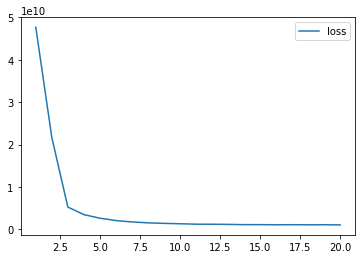

In [76]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

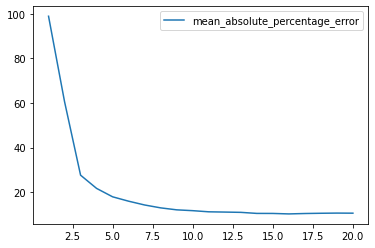

In [77]:
# Plot the accuracy
history_df.plot(y="mean_absolute_percentage_error")